### This is a copy of lstm.ipynb
### It is a sandbox for exploring confusion matrix variations
### In the multi-classification of behaviors





In [1]:
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Conv2D, Activation
from keras.preprocessing import sequence

Using TensorFlow backend.


In [2]:
from sklearn import metrics

import random

import numpy as np
import pandas as pd

import itertools
import csv

import matplotlib.pyplot as plt

In [3]:
"""# set parameters and load data (not needed unless retraining the model)
epochs = 100
batch_size = 10
time_steps = 6
features = 300
"""

features_path = 'input_vol.npy'
labels_path = 'input_label.npy'
behaviors_path = 'behavior.csv'

behaviors =[]

with open(behaviors_path) as f:
    reader = csv.reader(f)
    next(reader) # skip header
    behaviors = [r for r in reader]


X = np.load(features_path)
Y = np.load(labels_path)


#print(len(behave))
print(X.shape)
print(Y.shape)

(370, 6, 300)
(370, 4)


In [4]:
behaviors

[['1', ' chinese fire drill '],
 ['2', 'abusive cycle'],
 ['3', 'action assembly theory'],
 ['4', 'active'],
 ['5', 'adoption'],
 ['6', 'age 17 19'],
 ['7', 'aggresion towards objects'],
 ['8', 'aggressive'],
 ['9', 'alcohol use'],
 ['10', 'alienation'],
 ['11', 'alloplastic adaptation'],
 ['12', 'always and  never  statements'],
 ['13', 'ambitious'],
 ['14', 'anger'],
 ['15', 'animal abuse'],
 ['16', 'animal spirits'],
 ['17', 'argumentative'],
 ['18', 'asccismus'],
 ['19', 'assault with gun'],
 ['20', 'assault with knife'],
 ['21', 'assertive'],
 ['22', 'attention deficit hyperactivity disorder'],
 ['23', 'attention seeking'],
 ['24', 'attitude change'],
 ['25', 'autoplastic defense mechanism'],
 ['26', 'avoidance'],
 ['27', 'avoidance coping'],
 ['28', 'bad coping'],
 ['29', 'bad habit'],
 ['30', 'baiting'],
 ['31', 'beat'],
 ['32', 'beat up'],
 ['33', 'behavior'],
 ['34', 'behavior change'],
 ['35', 'behavioral confirmation'],
 ['36', 'behavioral contagion'],
 ['37', 'behavioral mo

In [5]:
B = pd.DataFrame(behaviors)[1]

In [6]:
B.head()

0       chinese fire drill 
1             abusive cycle
2    action assembly theory
3                    active
4                  adoption
Name: 1, dtype: object

In [7]:
# randomly shuffle data
s = np.arange(X.shape[0])
np.random.shuffle(s)
B = B.iloc[s]
X = X[s]
Y = Y[s]

In [9]:
# split data into train and test sets
train_behavior = B.iloc[0:296]
test_behavior = B.iloc[297:369]

train_index = train_behavior.index
test_index = test_behavior.index

train_X = X[0:296,:,:]
test_X = X[297:369,:,:]

train_Y = Y[0:296,:]
test_Y = Y[297:369,:]

In [10]:
train_behavior.head()

291                            rude
2            action assembly theory
55                  catastrophizing
125                 family conflict
168    inadequate physical activity
Name: 1, dtype: object

In [11]:
test_behavior.head()

1               abusive cycle
245                   passive
310    sexual objectification
133                force kiss
324                  spiteful
Name: 1, dtype: object

In [12]:
train_index

Int64Index([291,   2,  55, 125, 168, 129, 251, 175, 305, 357,
            ...
            280,  47,  44,  63, 153, 338, 205, 147, 192,  99],
           dtype='int64', length=296)

In [13]:
test_index

Int64Index([  1, 245, 310, 133, 324, 117, 293, 328, 118,  25, 169,  91, 234,
            356, 143, 225, 208, 239,  29, 317, 220,  46, 274,  41, 177,   5,
            235, 243, 154,  34, 227, 203, 306, 211, 190, 137,  70, 231,  40,
            182, 335,   3,  87, 266, 346, 308,   4, 160, 342, 275, 294, 351,
            216, 200, 185,  13, 196, 121,  39,  95,  65, 187, 277,  67, 228,
            128, 115, 104, 271, 152, 250, 191],
           dtype='int64')

In [14]:
"""# build LSTM layers and train model
# can be used if needed, but a saved model is loaded below.

model = Sequential()
model.add(LSTM(100, dropout= 0.2, input_shape=(time_steps, features)))
model.add(Activation('relu'))
model.add(Dense(4, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(train_X, train_Y, validation_data=(test_X, test_Y), epochs=epochs, batch_size=batch_size)"""

"# build LSTM layers and train model\n# can be used if needed, but a saved model is loaded below.\n\nmodel = Sequential()\nmodel.add(LSTM(100, dropout= 0.2, input_shape=(time_steps, features)))\nmodel.add(Activation('relu'))\nmodel.add(Dense(4, activation='sigmoid'))\nmodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])\nprint(model.summary())\nmodel.fit(train_X, train_Y, validation_data=(test_X, test_Y), epochs=epochs, batch_size=batch_size)"

In [15]:
# model.save('interrogator_model.h5')

In [16]:
model = load_model('interrogator_model.h5')

In [17]:
# score model and log accuracy
# artificially accurate - this number is not indicative of a proper fit
scores = model.evaluate(test_X, test_Y, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 96.18%


In [18]:
# get predictions
# each row corresponds to a behavior; each row corresponds to the classification for a given type of violence
y_pred = model.predict(test_X)
y_pred[0:5]

array([[  9.98386741e-01,   1.14779617e-03,   2.86405743e-03,
          3.42583342e-04],
       [  2.02959776e-03,   9.97257531e-01,   8.49920034e-04,
          1.28254382e-04],
       [  5.14499843e-04,   9.97346282e-01,   3.44453030e-03,
          9.95319307e-01],
       [  1.74618408e-03,   1.47091714e-03,   3.88463843e-04,
          9.98181939e-01],
       [  2.16704812e-02,   5.97029831e-03,   9.99302149e-01,
          1.11172954e-03]], dtype=float32)

In [19]:
# create list of classes for input to confusion matrix
# need to compe back and automate this.
all_permutations = [[0,0,0,0],[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1],[1,1,0,0],[1,0,1,0],[1,0,0,1],[0,1,1,0],[0,1,0,1],[0,0,1,1],[1,1,1,0],[1,1,0,1],[1,0,1,1],[0,1,1,1],[1,1,1,1]]
classes = []
for label in all_permutations:
    val = ""
    for x in label:
        val = val + str(int(x))
    classes.append(val)
    
classes

['0000',
 '1000',
 '0100',
 '0010',
 '0001',
 '1100',
 '1010',
 '1001',
 '0110',
 '0101',
 '0011',
 '1110',
 '1101',
 '1011',
 '0111',
 '1111']

In [20]:
len(classes)

16

In [21]:
# create y true and y predictions to input into confusion matrix
# values must be strings or ints for scikit-learn's confusion matrix, so we must transform them

yt = []
for label in test_Y:
    val = ""
    for x in label:
        val = val + str(int(x))
    yt.append(val)
    
yp = []
for label in y_pred:
    val = ""
    for x in label:
        
        val = val + str(int(0 if x < 0.8 else 1))
    yp.append(val)

print(yp)

['1000', '0100', '0101', '0001', '0010', '1000', '0000', '0111', '0001', '1000', '0001', '0011', '0101', '0000', '0111', '1000', '0000', '0000', '0000', '1000', '1011', '0000', '0011', '1010', '1001', '1000', '1010', '0000', '0000', '1000', '0000', '1010', '0001', '0000', '1111', '0001', '0000', '0000', '0111', '1100', '0110', '1000', '1010', '0000', '0100', '0001', '1000', '0101', '0000', '1111', '1010', '0011', '0100', '0000', '0000', '1010', '0000', '0000', '0000', '1000', '0000', '0000', '1001', '0011', '0000', '0001', '1011', '0010', '0001', '0000', '0000', '0001']


In [22]:
#Ben Note: The confusion matrix is not generating a full sized matrix; it should be
#fixed by adding an argument

confusion = metrics.confusion_matrix(yt, yp, labels = classes)
confusion

array([[20,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  4,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,

In [23]:
yp[0]

'1000'

In [24]:
y_pred[0]

array([  9.98386741e-01,   1.14779617e-03,   2.86405743e-03,
         3.42583342e-04], dtype=float32)

In [25]:
###------Need to create a function that lets you pick one of these pairings
###------and then it returns to you the corresponding entries

In [26]:
## TODO - get violence types, replace the 'V1'
## TODO - generalize number of violence columns
## TODO - distinguish between Violence_Cols for test and pred, for future dataframe concatenating

# Pretends 4 violence types "V1" through "V4"
# Create a list with the names for pandas frames
V1 = 'V1'
V2 = 'V2'
V3 = 'V3'
V4 = 'V4'
Violence_Cols = [V1, V2, V3, V4]

# Create a pandas DF of the test labels
test_Y_df = pd.DataFrame(test_Y)

# Change column names to the names of the violences
# Set the numbers as int (they comes as float)
test_Y_df.columns = Violence_Cols
test_Y_df = test_Y_df[Violence_Cols].astype('int')
test_Y_df.head()

,V1,V2,V3,V4
0,1,0,0,0
1,0,1,0,0
2,0,1,0,1
3,0,0,0,1
4,0,0,1,0


In [186]:

# Do something similar for predicted labels
# Create DF, rename cols, set to int
y_pred_df = pd.DataFrame(y_pred)
y_pred_df.columns = Violence_Cols

# Predicted values come as floats between 0 and 1, need to round before setting type to int
y_pred_df = y_pred_df.apply(lambda x: np.rint(x)) #<-- rounds to nearest
y_pred_df = y_pred_df[Violence_Cols].astype('int')

y_pred_df.head()

,V1,V2,V3,V4
0,1,0,0,0
1,0,1,0,0
2,0,1,0,1
3,0,0,0,1
4,0,0,1,0


In [205]:
# Create a function that lets you input the labels as a string i.e. '1000'
# and either the test labels or predicted labels
# and it will give a boolean column vector that can be used to select
# rows from the related dataframes.

def get_row_mask_by_labelset(label_set, df):
    """Input: a full label set for a single row, and
    the dataframe to match against.
    Returns: a boolean mask for the data frame that 
    can be used to filter out those rows.
    """
    categories_string = label_set
    char_num = 0
    
    compound_conditional = True

    # use for loop to chain AND for each character
    for each_char in categories_string:
        loop_cond = (df.iloc[:,char_num] == int(each_char))
        compound_conditional = compound_conditional & loop_cond
        char_num += 1
    
    return compound_conditional

#################################################################
#################################################################

# Create a function that uses the boolean mask with a data frame to return the rows

def get_rows_masked_by_labelset(label_set,df):
    """Returns the rows where the label set matches the labels in the data frame.
    """
    return df[get_row_mask_by_labelset(label_set,df)]

#################################################################
#################################################################

def get_row_mask_for_2dfs_and_2labels(label_set1,df1,label_set2,df2):
    """Returns a row mask where (masks of test AND predicted labels) are true. 
    """
    mask = get_row_mask_by_labelset(label_set1, df1) & get_row_mask_by_labelset(label_set2, df2)
    return mask

In [206]:
get_row_mask_by_labelset('0010', test_Y_df)[0:10]

0    False
1    False
2    False
3    False
4     True
5    False
6    False
7    False
8    False
9    False
dtype: bool

In [207]:
# 0010 w/ test labels
get_rows_masked_by_labelset('0010',test_Y_df)

,V1,V2,V3,V4
4,0,0,1,0
30,0,0,1,0
41,0,0,1,0
67,0,0,1,0


In [208]:
# 0010 w/ predicted labels
get_rows_masked_by_labelset('0010',y_p_df)

,V1,V2,V3,V4
4,0,0,1,0
67,0,0,1,0


In [209]:
## TODO - determine if this is redudant/conflict with the rint, above

# Use Lauren's filter on the dataframe
# nb - the 0.8 was arbitrary choice, and can be changed.

y_p_df = y_pred_df.applymap(lambda x: 0 if x < 0.8 else 1)

In [210]:
y_p_df.head()

,V1,V2,V3,V4
0,1,0,0,0
1,0,1,0,0
2,0,1,0,1
3,0,0,0,1
4,0,0,1,0


In [211]:
#y_p_df[get_row_mask_by_labelset('1000', test_Y_df) & get_row_mask_by_labelset('0010', y_p_df)]

In [212]:
test_Y_df[get_row_mask_for_2dfs_and_2labels('0100',test_Y_df,'0000',y_p_df)][0:10]

,V1,V2,V3,V4
33,0,1,0,0
37,0,1,0,0


In [213]:
y_p_df.head()

,V1,V2,V3,V4
0,1,0,0,0
1,0,1,0,0
2,0,1,0,1
3,0,0,0,1
4,0,0,1,0


In [214]:
# plot confusion matrix with class labels

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


Confusion matrix, without normalization
[[20  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  1  0  2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  2  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  4  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2]]


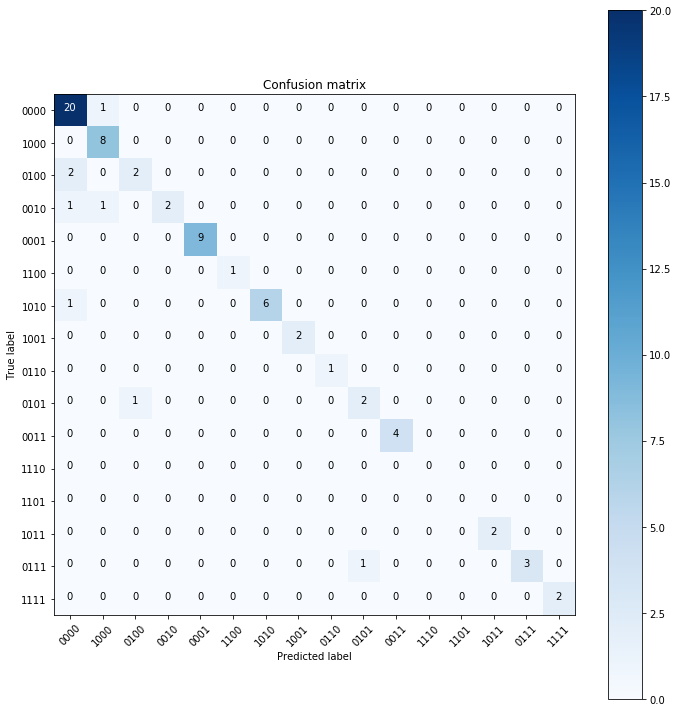

In [215]:
# compute confusion matrix
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix


plt.figure(figsize=(10,10))
plot_confusion_matrix(confusion, classes=classes, title='Confusion matrix')

plt.show()

In [216]:
test_Y_df.head()

,V1,V2,V3,V4
0,1,0,0,0
1,0,1,0,0
2,0,1,0,1
3,0,0,0,1
4,0,0,1,0


In [217]:
len(test_Y_df)

72

In [218]:
test_index.shape

(72,)

In [219]:
pd.concat([test_behavior,test_Y_df,y_pred_df],axis=1).dropna().head()

,1,V1,V2,V3,V4,V1,V2,V3,V4
1,abusive cycle,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,active,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,adoption,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,age 17 19,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13,anger,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [137]:
test_behavior.iloc[58]

'belittling  condescending and patronizing'

In [138]:
test_Y_df.loc[(test_Y_df['V1']==0) & (test_Y_df['V2']==1) & (test_Y_df['V3']==0) & (test_Y_df['V4']==0) & (y_pred_df['V2']==0),:]

,V1,V2,V3,V4
33,0,1,0,0
37,0,1,0,0


In [139]:
test_behavior.iloc[test_Y_df.loc[(test_Y_df['V1']==0) & (test_Y_df['V2']==1) & (test_Y_df['V3']==0) & (test_Y_df['V4']==0) & (y_pred_df['V2']==0),:].index]

211    manipulation
231     normalizing
Name: 1, dtype: object

In [140]:
pd.concat([test_behavior,test_Y_df,y_pred_df],axis=1).head()

,1,V1,V2,V3,V4,V1,V2,V3,V4
0,NaN,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,abusive cycle,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,NaN,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
3,active,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,adoption,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [141]:
index_of_interest = test_Y_df.loc[(test_Y_df['V1']==0) & (test_Y_df['V2']==1) & (test_Y_df['V3']==0) & (test_Y_df['V4']==0) & (y_pred_df['V2']==0),:].index[0]

In [232]:
test_behavior.iloc[index_of_interest]

'manipulation'

In [233]:
test_mask = (test_Y_df['V1']==0) & (test_Y_df['V2']==0) & (test_Y_df['V3']==1) & (test_Y_df['V4']==1)

In [234]:
test_mask[test_mask==True]

11    True
22    True
51    True
63    True
dtype: bool

In [220]:
def retrieve_behavior_name(V1,V2,V3,V4,test_Y_df,V1_,V2_,V3_,V4_,pred_Y_df,behaviors):
    test_mask = (test_Y_df['V1']==V1) & (test_Y_df['V2']==V2) & (test_Y_df['V3']==V3) & (test_Y_df['V4']==V4)
    pred_mask = (pred_Y_df['V1']==V1_) & (pred_Y_df['V2']==V2_) & (pred_Y_df['V3']==V3_) & (pred_Y_df['V4']==V4_)
    
    #print(test_mask[test_mask==True])
    #print(pred_mask[pred_mask==True])
    #print(pred_mask[(test_mask==True) & (pred_mask==True)])
    
    #This part doesn't work yet:
    indexes_of_interest = test_mask[(test_mask==True) & (pred_mask==True)].index
    
    #print(indexes_of_interest)
    return behaviors.iloc[indexes_of_interest]
    

In [221]:
retrieve_behavior_name(0,1,0,0,test_Y_df,0,0,0,0,y_pred_df,test_behavior)

211    manipulation
231     normalizing
Name: 1, dtype: object

In [222]:
retrieve_behavior_name(0,0,1,1,test_Y_df,0,0,1,1,y_pred_df,test_behavior)

91          demand sex
274    push out of car
351    throw something
67         coerced sex
Name: 1, dtype: object

In [223]:
retrieve_behavior_name(0,0,1,1,test_Y_df,0,0,1,0,y_pred_df,test_behavior)

Series([], Name: 1, dtype: object)

In [224]:
retrieve_behavior_name(0,0,1,1,test_Y_df,0,0,0,1,y_pred_df,test_behavior)

Series([], Name: 1, dtype: object)

In [225]:
retrieve_behavior_name(0,1,1,1,test_Y_df,0,1,0,1,y_pred_df,test_behavior)

234    objectification
Name: 1, dtype: object

In [226]:
# The hand-input numbers may change if the data is reshuff led
pd.concat([test_Y_df[get_row_mask_for_2dfs_and_2labels('0110',test_Y_df,'1101',y_p_df)],
           y_p_df[get_row_mask_for_2dfs_and_2labels('0001',test_Y_df,'1010',y_p_df)]],axis=1)

,V1,V2,V3,V4,V1,V2,V3,V4


In [227]:
get_rows_masked_by_labelset('1111',test_Y_df)

,V1,V2,V3,V4
34,1,1,1,1
49,1,1,1,1


In [228]:
get_rows_masked_by_labelset('1111',y_p_df)

,V1,V2,V3,V4
34,1,1,1,1
49,1,1,1,1


In [229]:
def get_concat_classifiers(test_label_set, test_df, pred_label_set, pred_label_df):
    """Uses masks to expose the rows where the test data frame has the first set of labels
    and the predicted data frame has the second set of labels. 
    Outputs the contatenation of the two.
    
    """
    
    tdf = test_df
    pdf = pred_label_df
    
    tlbl = test_label_set
    plbl = pred_label_set
    
    mask = get_row_mask_for_2dfs_and_2labels(tlbl, tdf, plbl, pdf)
       
    return pd.concat([tdf[mask],pdf[mask]], axis=1)

In [230]:
# The hand-input numbers may change if the data is reshuffled
get_concat_classifiers('1110',test_Y_df,'0000',y_p_df)

,V1,V2,V3,V4,V1,V2,V3,V4


In [231]:
test_Y_df[Violence_Cols[0]].sum()
#There are 29 positives, but if the data is reshuffled this will change.


# The labels below should be [0, 1] or [No, Yes]

22

In [157]:
test_Y_df[Violence_Cols[0]]
y_p_df.sum()

V1    23
V2    14
V3    20
V4    25
dtype: int64

Confusion matrix, without normalization
[[48  2]
 [ 1 21]]


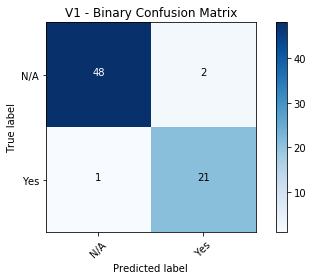

Confusion matrix, without normalization
[[56  1]
 [ 2 13]]


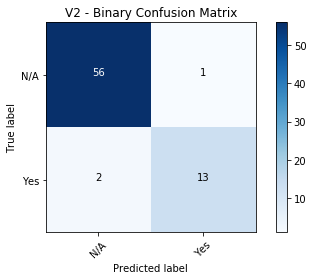

Confusion matrix, without normalization
[[48  0]
 [ 4 20]]


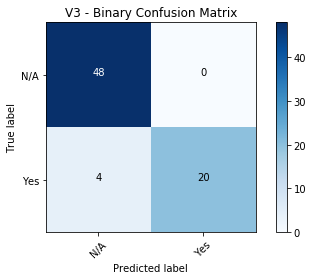

Confusion matrix, without normalization
[[46  0]
 [ 1 25]]


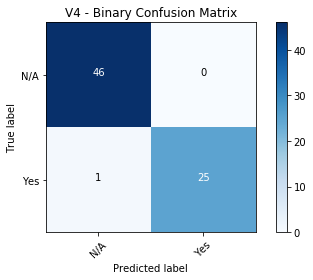

In [158]:
for each_cat in Violence_Cols:
    conf_mat = metrics.confusion_matrix(test_Y_df[each_cat],y_p_df[each_cat])
    plot_confusion_matrix(conf_mat, ['N/A', 'Yes'], title = (str(each_cat) + " - Binary Confusion Matrix" ))
    plt.show()

In [159]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [160]:
index = 0

for each_cat in Violence_Cols:
    
    ac = accuracy_score(test_Y_df[each_cat],y_p_df[each_cat])
    pr = precision_score(test_Y_df[each_cat],y_p_df[each_cat])
    rc = recall_score(test_Y_df[each_cat],y_p_df[each_cat])
    f1 = f1_score(test_Y_df[each_cat],y_p_df[each_cat])
    
    print(str(each_cat) + " | Acc: %.2f" % ac + " | Prec: %.2f" % pr + \
          " | Rec: %.2f" % rc + " | f1: %.2f" % f1)
    
    index = index + 1

V1 | Acc: 0.96 | Prec: 0.91 | Rec: 0.95 | f1: 0.93
V2 | Acc: 0.96 | Prec: 0.93 | Rec: 0.87 | f1: 0.90
V3 | Acc: 0.94 | Prec: 1.00 | Rec: 0.83 | f1: 0.91
V4 | Acc: 0.99 | Prec: 1.00 | Rec: 0.96 | f1: 0.98


In [161]:
ypd = y_p_df
ytd = test_Y_df

In [162]:
#Number of incorect predictions per violence type
#Math rationale: y's are 0 or 1, so the difference is either +1, 0 or -1; square it to make +1 and 0, then sum
column_sum_incorrect = ((ypd - ytd)**2).sum(axis=0)

In [163]:
column_sum_incorrect.head()

V1    3
V2    3
V3    4
V4    1
dtype: int64

In [164]:
#Number of incorrect predictions for an individual behavior entry
row_sum_inccorect = ((ypd - ytd)**2).sum(axis=1)

In [165]:
row_sum_inccorect.head()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [166]:
row_sum_inccorect.max()

2

In [167]:
ypd.loc[row_sum_inccorect == 4]

,V1,V2,V3,V4


In [168]:
ypd.loc[row_sum_inccorect == 3]

,V1,V2,V3,V4


In [169]:
ypd.loc[row_sum_inccorect == 2]

,V1,V2,V3,V4
41,1,0,0,0
60,0,0,0,0


In [170]:
ypd.loc[row_sum_inccorect == 1]

,V1,V2,V3,V4
10,0,1,0,1
12,0,1,0,1
29,1,0,0,0
30,0,0,0,0
33,0,0,0,0
37,0,0,0,0
52,0,1,0,0


In [171]:
# Need to find what is classified well/not well
print(ytd.iloc[1])
print(ypd.iloc[1])

V1    0
V2    1
V3    0
V4    0
Name: 1, dtype: int32
V1    0
V2    1
V3    0
V4    0
Name: 1, dtype: int64


In [172]:
collect_scores = pd.DataFrame()
row_scores_columns = ['Num_Incorrect', 'X-Accuracy', 'X-Precision', 'X-Recall']

for each_row_idx in ytd.index:
    #print(each_row_idx)
    
    incorrect = ((ypd - ytd)**2).sum(axis=1)
    
    Xac = accuracy_score(ytd.iloc[each_row_idx], ypd.iloc[each_row_idx])
    Xpr = precision_score(ytd.iloc[each_row_idx], ypd.iloc[each_row_idx])
    Xre = recall_score(ytd.iloc[each_row_idx], ypd.iloc[each_row_idx])
    
    collect_scores[each_row_idx] = [incorrect[each_row_idx].astype('int'), Xac, Xpr, Xre]
    
collect_scores = collect_scores.T
collect_scores.columns = row_scores_columns
collect_scores.head()

C:\Users\Ben\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ben\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,Num_Incorrect,X-Accuracy,X-Precision,X-Recall
0,0.0,1.0,1.0,1.0
1,0.0,1.0,1.0,1.0
2,0.0,1.0,1.0,1.0
3,0.0,1.0,1.0,1.0
4,0.0,1.0,1.0,1.0


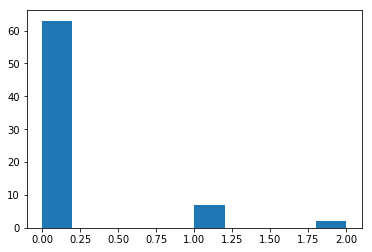

In [173]:
#scaling int he plot is a bit strang
plt.hist(collect_scores['Num_Incorrect'])
plt.show()

In [174]:
collect_scores.head()

,Num_Incorrect,X-Accuracy,X-Precision,X-Recall
0,0.0,1.0,1.0,1.0
1,0.0,1.0,1.0,1.0
2,0.0,1.0,1.0,1.0
3,0.0,1.0,1.0,1.0
4,0.0,1.0,1.0,1.0


In [175]:
combined = pd.concat([ytd,ypd,collect_scores],axis=1)

In [176]:
combined.head()

,V1,V2,V3,V4,V1,V2,V3,V4,Num_Incorrect,X-Accuracy,X-Precision,X-Recall
0,1,0,0,0,1,0,0,0,0.0,1.0,1.0,1.0
1,0,1,0,0,0,1,0,0,0.0,1.0,1.0,1.0
2,0,1,0,1,0,1,0,1,0.0,1.0,1.0,1.0
3,0,0,0,1,0,0,0,1,0.0,1.0,1.0,1.0
4,0,0,1,0,0,0,1,0,0.0,1.0,1.0,1.0


In [177]:
combined.loc[combined["Num_Incorrect"]==4]

,V1,V2,V3,V4,V1,V2,V3,V4,Num_Incorrect,X-Accuracy,X-Precision,X-Recall


In [178]:
combined.loc[combined["Num_Incorrect"]==3]

,V1,V2,V3,V4,V1,V2,V3,V4,Num_Incorrect,X-Accuracy,X-Precision,X-Recall


In [179]:
combined.loc[combined["Num_Incorrect"]==2]

,V1,V2,V3,V4,V1,V2,V3,V4,Num_Incorrect,X-Accuracy,X-Precision,X-Recall
41,0,0,1,0,1,0,0,0,2.0,0.5,0.0,0.0
60,1,0,1,0,0,0,0,0,2.0,0.5,0.0,0.0


In [180]:
combined.loc[combined["Num_Incorrect"]==1]

,V1,V2,V3,V4,V1,V2,V3,V4,Num_Incorrect,X-Accuracy,X-Precision,X-Recall
10,0,0,0,1,0,1,0,1,1.0,0.75,0.5,1.000000
12,0,1,1,1,0,1,0,1,1.0,0.75,1.0,0.666667
29,0,0,0,0,1,0,0,0,1.0,0.75,0.0,0.000000
30,0,0,1,0,0,0,0,0,1.0,0.75,0.0,0.000000
33,0,1,0,0,0,0,0,0,1.0,0.75,0.0,0.000000
37,0,1,0,0,0,0,0,0,1.0,0.75,0.0,0.000000
52,0,1,0,1,0,1,0,0,1.0,0.75,1.0,0.500000


In [181]:
combined.loc[combined["Num_Incorrect"]==0]

,V1,V2,V3,V4,V1,V2,V3,V4,Num_Incorrect,X-Accuracy,X-Precision,X-Recall
0,1,0,0,0,1,0,0,0,0.0,1.0,1.0,1.0
1,0,1,0,0,0,1,0,0,0.0,1.0,1.0,1.0
2,0,1,0,1,0,1,0,1,0.0,1.0,1.0,1.0
3,0,0,0,1,0,0,0,1,0.0,1.0,1.0,1.0
4,0,0,1,0,0,0,1,0,0.0,1.0,1.0,1.0
5,1,0,0,0,1,0,0,0,0.0,1.0,1.0,1.0
6,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0
7,0,1,1,1,0,1,1,1,0.0,1.0,1.0,1.0
8,0,0,0,1,0,0,0,1,0.0,1.0,1.0,1.0
9,1,0,0,0,1,0,0,0,0.0,1.0,1.0,1.0
